In [236]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from numpy import linspace, exp, mean, log10

In [237]:
# Constants
c = 299792458
h = 6.62607004E-34
k = 1.38064852E-23

## Exercise 1

In [238]:
# Blackbody spectrum
def B(λ, T):
    return ((2 * h * c**2) / (λ**5)) / (exp((h * c) / (λ * k * T)) - 1)

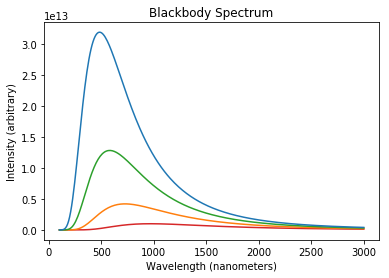

In [239]:
# Plot for blackbody spectrum
x = linspace(1.0E-7, 3.0E-6, 300)
y = [B(x, 3000), B(x, 4000), B(x, 5000), B(x, 6000)]

fig, ax = plt.subplots()
ax.plot(x, y[0], color = 'C3')
ax.plot(x, y[1], color = 'C1')
ax.plot(x, y[2], color = 'C2')
ax.plot(x, y[3], color = 'C0')
ax.set_title("Blackbody Spectrum")
ax.set_xlabel("Wavelength (nanometers)")
ax.set_ylabel("Intensity (arbitrary)")

# Adjust the x axis scale to nanometers
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / 1.0E-9))
ax.xaxis.set_major_formatter(ticks)

Compared to this figure, the one provided in the text seemed to have a slighly different shape. It appears that the peaks at each temperature are shifted a little too far right. Thus, the labeled temperatures should be lower than what is represented.

## Exercise 2

In [240]:
# Bandwith of blue and visible filters
b = [(445 - (94 / 2)) * 1.0E-9, (445 + (94 / 2)) * 1.0E-9]
v = [(551 - (88 / 2)) * 1.0E-9, (551 + (88 / 2)) * 1.0E-9]
bl = linspace(b[0], b[1], 300)
vl = linspace(v[0], v[1], 300)

# Mean intensity of a 10000K blackbody
b10k = mean(B(bl, 10000))
v10k = mean(B(vl, 10000))

print("blue mean intensity: {:.2E}".format(b10k))
print("visual mean intensity: {:.2E}".format(v10k))

blue mean intensity: 2.81E+14
visual mean intensity: 1.87E+14


## Exercise 3

In [241]:
# Mean intensity of a 5000K blackbody
b5k = mean(B(bl, 5000))
v5k = mean(B(vl, 5000))

# Magnitude
bm = -2.5 * log10((b5k / b10k))
vm = -2.5 * log10((v5k / v10k))

print("B-V for 5000K blackbody: {}".format(bm - vm))

B-V for 5000K blackbody: 0.6429564654439961


In [242]:
# Repeat the above for the below temperatures
temps = [42000, 30000, 9790, 7300, 5940, 5150, 3840]

for i in range (0, len(temps)):
    bXk = -2.5 * log10(mean(B(bl, temps[i])) / b10k)
    vXk = -2.5 * log10(mean(B(vl, temps[i])) / v10k)
    print("{}K: {}".format(temps[i], bXk - vXk))

42000K: -0.4084291508625788
30000K: -0.36546139273069933
9790K: 0.013115667099622863
7300K: 0.23245303636029746
5940K: 0.4358810498185881
5150K: 0.6048220497704726
3840K: 1.036413283087521


The above numbers do not match the provided table, but are within the realm of reason. Medium temperatures are typically close, high temperatures are not too far off, and low temperatures vary more wildly. This could be due to using different references for each table.